In [ ]:
!pip install ipython-autotime

# Import Library

In [ ]:
import pandas as pd
import tensorflow as tf
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint,EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Data Preprocessing


Importing Dataset & Selecting Column

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset source : https://www.kaggle.com/ishantjuyal/emotions-in-text/code

In [ ]:
path = "/content/drive/MyDrive/IDCAMP/Project 2 : Sentiment Analysis/Emotion_final.csv"
dataset = pd.read_csv(path)
dataset.shape

(21459, 2)

In [ ]:
print(dataset.head(5))
print('Missing Data : ')
print(dataset.isnull().sum())

                                                Text  Emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger
Missing Data : 
Text       0
Emotion    0
dtype: int64


Split Data to Independent & Dependent Variable

In [ ]:
x = dataset.iloc[:,0].values
y = dataset.iloc[:,1].values

Convert lowercase, remove punctuation on Independent variable

In [ ]:
exclude = set(string.punctuation)
for i in range(len(x)):
  x[i] = ''.join(ch for ch in x[i] if ch not in exclude)
  x[i] = x[i].lower()

Encode Dependent Variable with Label Encoder

In [ ]:
label_encode = LabelEncoder()
y = label_encode.fit_transform(y)

Tokenize & Sequence

In [ ]:
#Tokenize
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(x)

#Sequence & Padding
sequence = tokenizer.texts_to_sequences(x)
padding = pad_sequences(sequence)

Split Data Train & Validation

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(padding, y, test_size=0.2)

## TRAIN & VALIDATION

Jaringan LSTM yang dibuat dengan Architecture RNN. Terdapat beberapa modifikasi Hyperparameter & layer dari sumber yang tertera.

source : https://www.tensorflow.org/text/tutorials/text_classification_rnn

Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=128, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Training & Validation Process

In [ ]:
num_epochs = 30
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')
history = model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_test, y_test), verbose=2, callbacks=early)
#Early Stopping digunakan untuk mengentikan proses training ketika akurasi tidak lagi naik pada sekian epoch yang ditentukan.
#Disini saya melakukan training dengan 30 epoch dan patience 5, yaitu ketika 5 epoch akurasi tidak naik maka proses training akan dihentikan.

Epoch 1/30
537/537 - 120s - loss: 1.1205 - accuracy: 0.5691 - val_loss: 0.6751 - val_accuracy: 0.7612
Epoch 2/30
537/537 - 102s - loss: 0.4803 - accuracy: 0.8475 - val_loss: 0.3460 - val_accuracy: 0.8886
Epoch 3/30
537/537 - 102s - loss: 0.2730 - accuracy: 0.9147 - val_loss: 0.3038 - val_accuracy: 0.9033
Epoch 4/30
537/537 - 103s - loss: 0.2059 - accuracy: 0.9378 - val_loss: 0.3245 - val_accuracy: 0.9061
Epoch 5/30
537/537 - 102s - loss: 0.1825 - accuracy: 0.9438 - val_loss: 0.3003 - val_accuracy: 0.9101
Epoch 6/30
537/537 - 103s - loss: 0.1349 - accuracy: 0.9577 - val_loss: 0.3207 - val_accuracy: 0.9073
Epoch 7/30
537/537 - 104s - loss: 0.1116 - accuracy: 0.9638 - val_loss: 0.3234 - val_accuracy: 0.9126
Epoch 8/30
537/537 - 104s - loss: 0.0955 - accuracy: 0.9678 - val_loss: 0.3669 - val_accuracy: 0.9075
Epoch 9/30
537/537 - 103s - loss: 0.0795 - accuracy: 0.9738 - val_loss: 0.3699 - val_accuracy: 0.9122
Epoch 10/30
537/537 - 103s - loss: 0.0708 - accuracy: 0.9772 - val_loss: 0.4379 - 

Plot Visualization

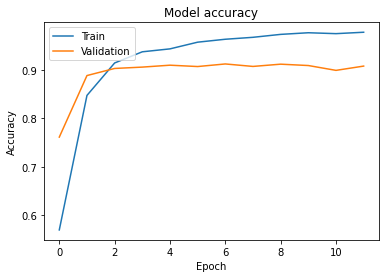

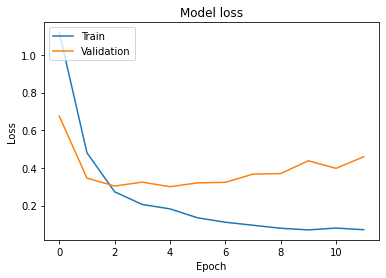

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()